In [7]:
import matplotlib.pyplot as plt
import wandb
import numpy as np
api = wandb.Api()

In [9]:
baseline_shopping_low = api.run("/shmvdhelm-technical-university-eindhoven/chargaxTest/runs/hygn2ven").history()
shopping_low_dis100_unch90 = api.run("/shmvdhelm-technical-university-eindhoven/chargaxTest/runs/ol2gdrua").history()
shopping_low_dis2000_unch90 = api.run("/shmvdhelm-technical-university-eindhoven/chargaxTest/runs/89twnr63").history()

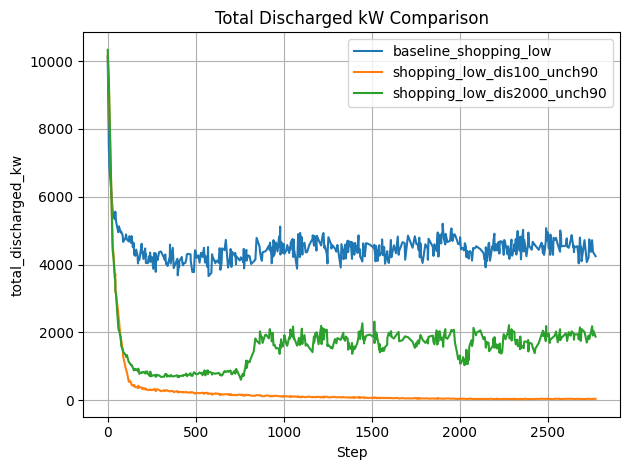

In [ ]:
# Choose x-axis: use global step if available, otherwise index
x_base = baseline_shopping_low.get("_step", baseline_shopping_low.index)

plt.figure()
plt.plot(x_base, baseline_shopping_low["total_discharged_kw"],
         label="baseline_shopping_low")
plt.plot(x_base, shopping_low_dis100_unch90["total_discharged_kw"],
         label="shopping_low_dis100_unch90")
plt.plot(x_base, shopping_low_dis2000_unch90["total_discharged_kw"],
         label="shopping_low_dis2000_unch90")

plt.xlabel("Step")
plt.ylabel("total_discharged_kw")
plt.title("Total Discharged kW Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

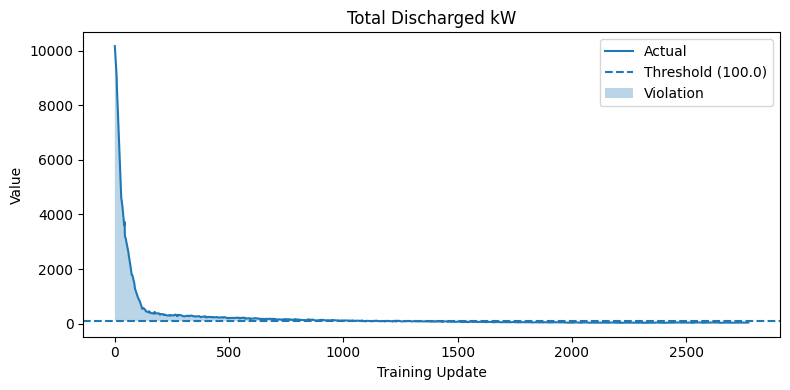

In [ ]:

# X-axis: training update or step
x = shopping_low_dis100_unch90.get("_step", shopping_low_dis100_unch90.index)

# Actual metric
y = shopping_low_dis100_unch90["total_discharged_kw"]

# Threshold: use logged values, assume constant (or piecewise-constant)
thr_col = "thresholds/total_discharged_kw"
if thr_col in shopping_low_dis100_unch90.columns:
    thr_series = shopping_low_dis100_unch90[thr_col].replace([np.inf, -np.inf], np.nan)
    # forward/back fill in case it's only logged sometimes
    thr_series = thr_series.ffill().bfill()
    threshold = float(thr_series.iloc[-1])
else:
    raise KeyError(f"{thr_col} not found in run history")

# Plot
plt.figure(figsize=(8, 4))

# Actual series
plt.plot(x, y, label="Actual")

# Threshold line
plt.axhline(threshold, linestyle="--", label=f"Threshold ({threshold:.1f})", color="red")

# Violation shading: where Actual > Threshold
plt.fill_between(
    x,
    threshold,
    y,
    where=(y > threshold),
    alpha=0.3,
    label="Violation",
    color="red"
)

plt.title("Total Discharged kW")
plt.xlabel("Training Update")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# X-axis: training update or step
x = shopping_low_dis100_unch90.get("_step", shopping_low_dis100_unch90.index)

# Actual metric
y = shopping_low_dis100_unch90["total_discharged_kw"]

# Threshold: use logged values, assume constant (or piecewise-constant)
thr_col = "thresholds/total_discharged_kw"
if thr_col in shopping_low_dis100_unch90.columns:
    thr_series = shopping_low_dis100_unch90[thr_col].replace([np.inf, -np.inf], np.nan)
    # forward/back fill in case it's only logged sometimes
    thr_series = thr_series.ffill().bfill()
    threshold = float(thr_series.iloc[-1])
else:
    raise KeyError(f"{thr_col} not found in run history")

# Plot
plt.figure(figsize=(8, 4))

# Actual series
plt.plot(x, y, label="Actual")

# Threshold line
plt.axhline(threshold, linestyle="--", label=f"Threshold ({threshold:.1f})")

# Violation shading: where Actual > Threshold
plt.fill_between(
    x,
    threshold,
    y,
    where=(y > threshold),
    alpha=0.3,
    label="Violation",
)

plt.title("Total Discharged kW")
plt.xlabel("Training Update")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()